In [0]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
#from google.colab import files

In [0]:
def computeDisparityBySSD(left_img, right_img, block_size, numDisparities):
    d_map = np.zeros(left_img.shape, dtype=float)
    height, width, channels = left_img.shape
    
    for i in range(height):
        for j in range(block_size + numDisparities, width - block_size + 1):
            ssd = np.empty([numDisparities, 1])
            l = left_img[i, (j - block_size):(j + block_size)]
            
            for d in range(numDisparities):
                r = right_img[i, (j - d - block_size):(j - d + block_size)]
                ssd[d] = np.sum((l[:,:]-r[:,:])**2)                                 
            
            d_map[i, j] = np.argmin(ssd)
        print("Completed {} row".format(str(i)))
    
    return d_map

In [0]:
def computeDisparityBySGBM(left_img, right_img, block_size):
    sgbm_left = cv2.StereoSGBM_create(
        blockSize = block_size,
        minDisparity = 0,
        numDisparities = 16,
        disp12MaxDiff = 1,
        uniquenessRatio = 10,
        speckleWindowSize = 100,
        speckleRange = 32,
        P1 = 8*3*block_size**2,
        P2 = 32*3*block_size**2,
    )
    sgbm_right = cv2.ximgproc.createRightMatcher(sgbm_left)
    
    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=sgbm_left)
    wls_filter.setLambda(80000)
    wls_filter.setSigmaColor(1.2)
    
    d_map_left = sgbm_left.compute(left_img, right_img)
    d_map_right = sgbm_right.compute(left_img, right_img)
    
    d_map_left = np.int16(d_map_left)
    d_map_right = np.int16(d_map_right)
    
    d_map = wls_filter.filter(d_map_left, left_img, None, d_map_right)
    
    d_map = cv2.normalize(src=d_map, dst=d_map, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
    d_map = np.uint8(d_map)

    return d_map

In [162]:
#uploaded = files.upload()

Saving im0.png to im0 (2).png
Saving im1.png to im1 (2).png


In [0]:
left_img = cv2.imread('./data/rectified/01/im0.png')
right_img = cv2.imread('./data/rectified/01/im1.png')

In [0]:
block_size = 5
numDisparities = 16

In [169]:
d_map_ssd = computeDisparityBySSD(left_img, right_img, block_size, numDisparities)

Completed 0 row
Completed 1 row
Completed 2 row
Completed 3 row
Completed 4 row
Completed 5 row
Completed 6 row
Completed 7 row
Completed 8 row
Completed 9 row
Completed 10 row
Completed 11 row
Completed 12 row
Completed 13 row
Completed 14 row
Completed 15 row
Completed 16 row
Completed 17 row
Completed 18 row
Completed 19 row
Completed 20 row
Completed 21 row
Completed 22 row
Completed 23 row
Completed 24 row
Completed 25 row
Completed 26 row
Completed 27 row
Completed 28 row
Completed 29 row
Completed 30 row
Completed 31 row
Completed 32 row
Completed 33 row
Completed 34 row
Completed 35 row
Completed 36 row
Completed 37 row
Completed 38 row
Completed 39 row
Completed 40 row
Completed 41 row
Completed 42 row
Completed 43 row
Completed 44 row
Completed 45 row
Completed 46 row
Completed 47 row
Completed 48 row
Completed 49 row
Completed 50 row
Completed 51 row
Completed 52 row
Completed 53 row
Completed 54 row
Completed 55 row
Completed 56 row
Completed 57 row
Completed 58 row
Complet

In [0]:
d_map_ssd_filtered = cv2.normalize(src=d_map_ssd, dst=d_map_ssd, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
d_map_ssd_filtered = np.uint8(d_map_ssd_filtered)

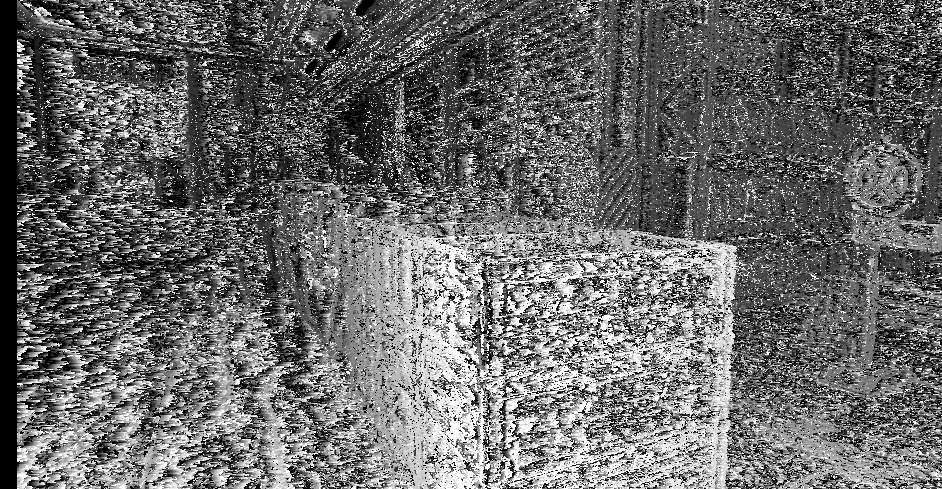

In [0]:
cv2_imshow(d_map_ssd_filtered) # block_size = 1

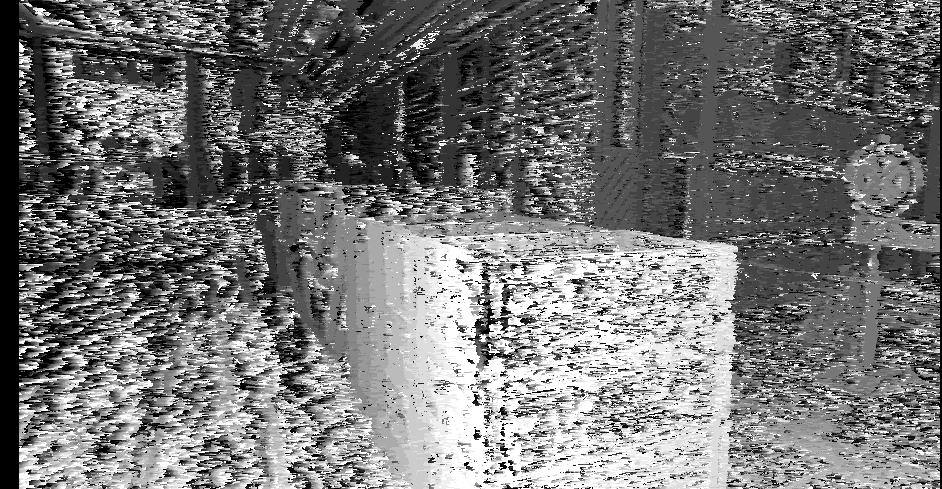

In [0]:
cv2_imshow(d_map_ssd_filtered) # block_size = 3

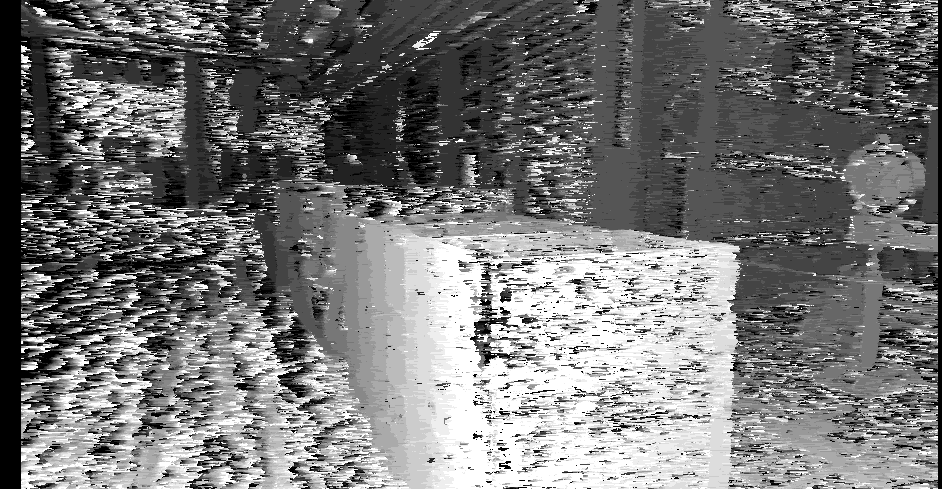

In [0]:
cv2_imshow(d_map_ssd_filtered) # block_size = 5

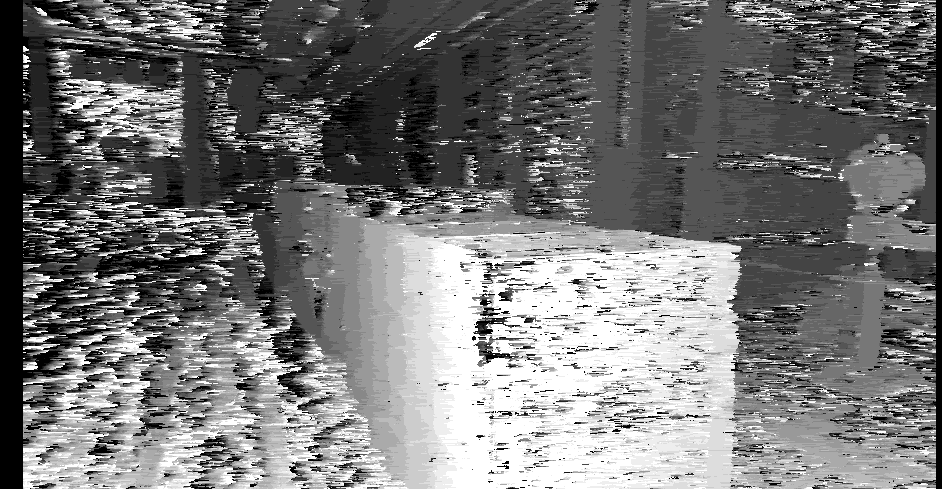

In [159]:
cv2_imshow(d_map_ssd_filtered) # block_size = 7

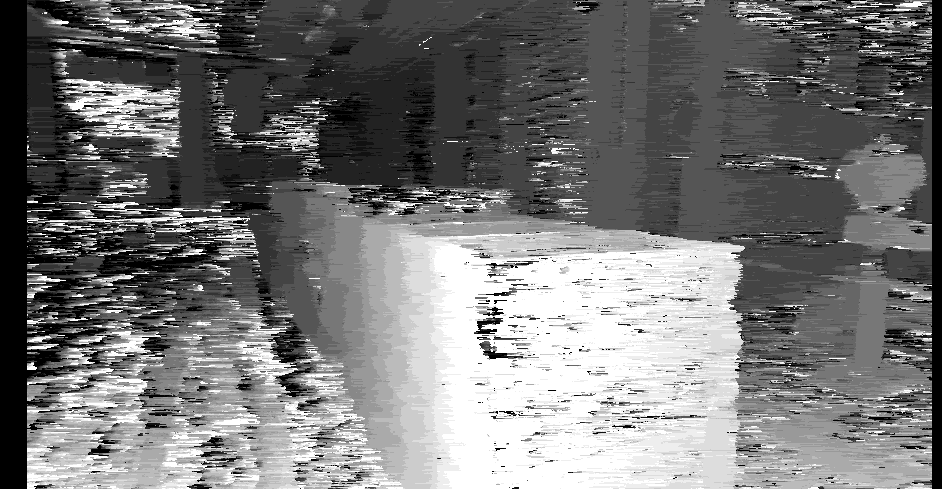

In [170]:
cv2_imshow(d_map_ssd_filtered) # block_size = 9

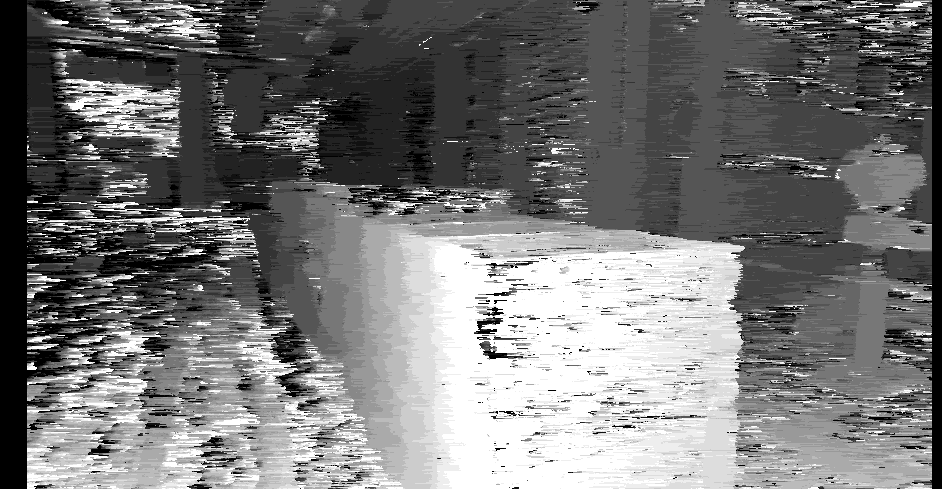

In [167]:
cv2_imshow(d_map_ssd_filtered) # block_size = 11

In [0]:
d_map_sgbm = np.zeros(left.shape, dtype=float)
d_map_sgbm = computeDisparityBySGBM(d_map_sgbm, left, right)

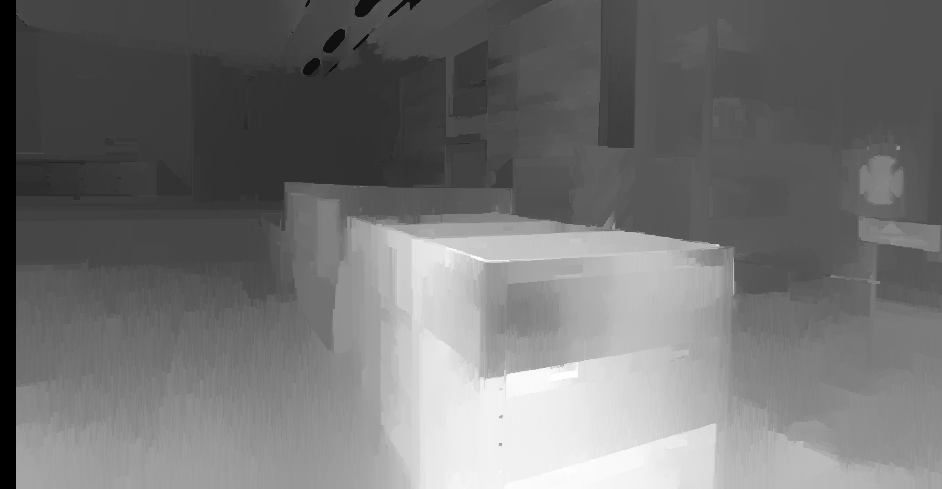

In [0]:
cv2_imshow(d_map_sgbm) # block_size = 1

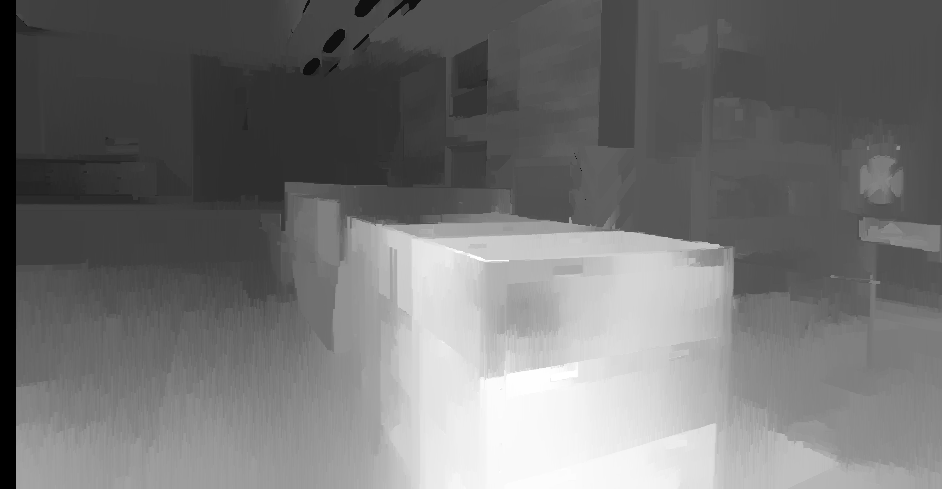

In [0]:
cv2_imshow(d_map_sgbm) # block_size = 3

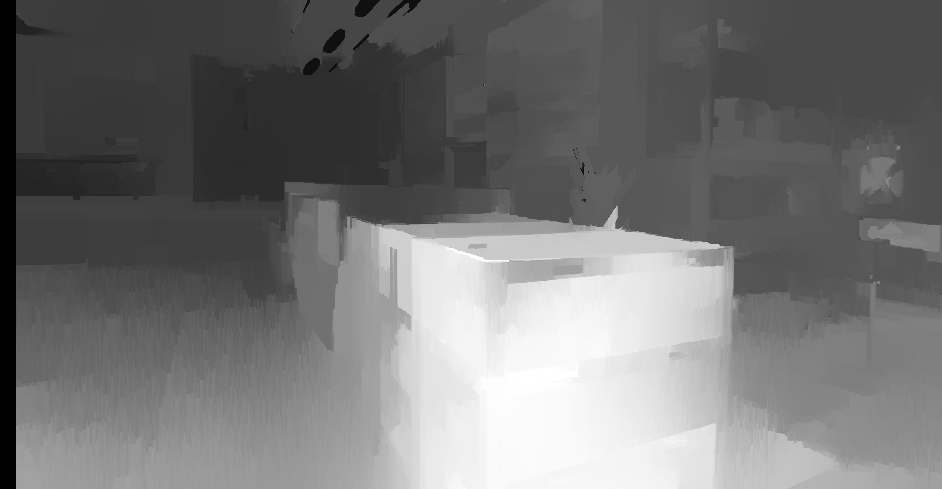

In [0]:
cv2_imshow(d_map_sgbm) # block_size = 5

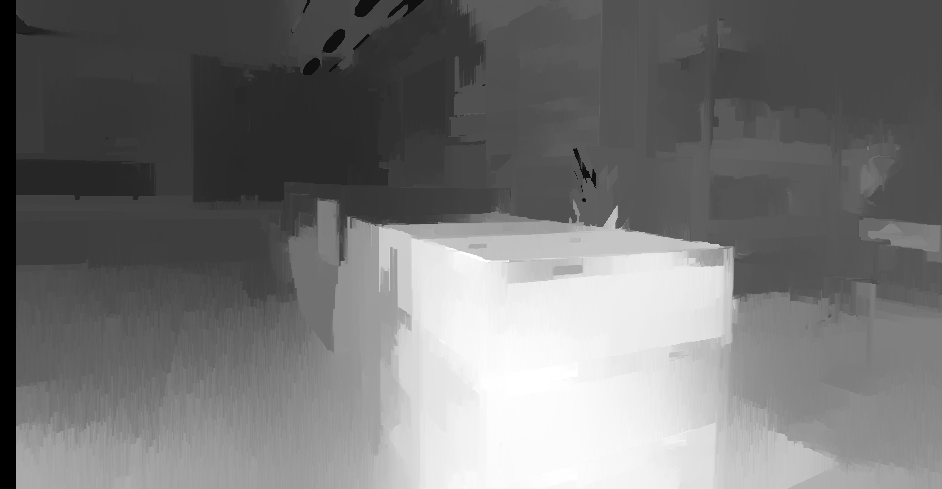

In [173]:
cv2_imshow(d_map_sgbm) # block_size = 7

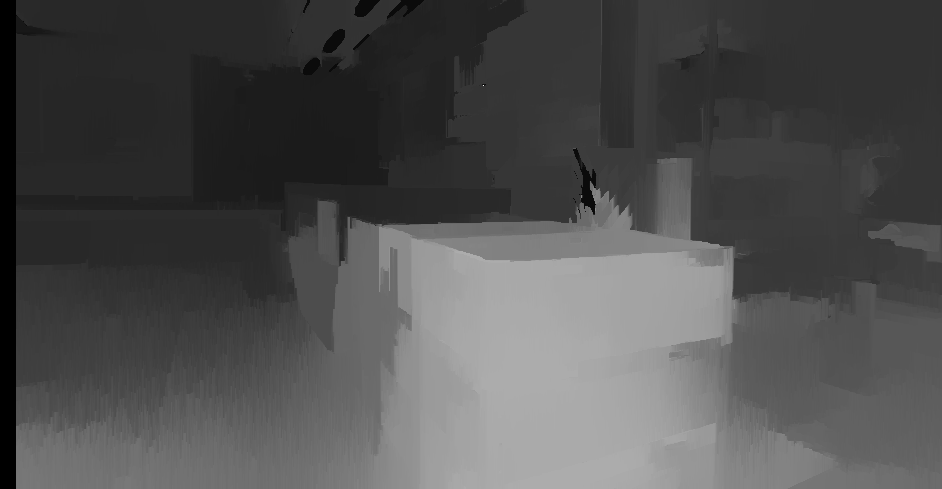

In [176]:
cv2_imshow(d_map_sgbm) # block_size = 9

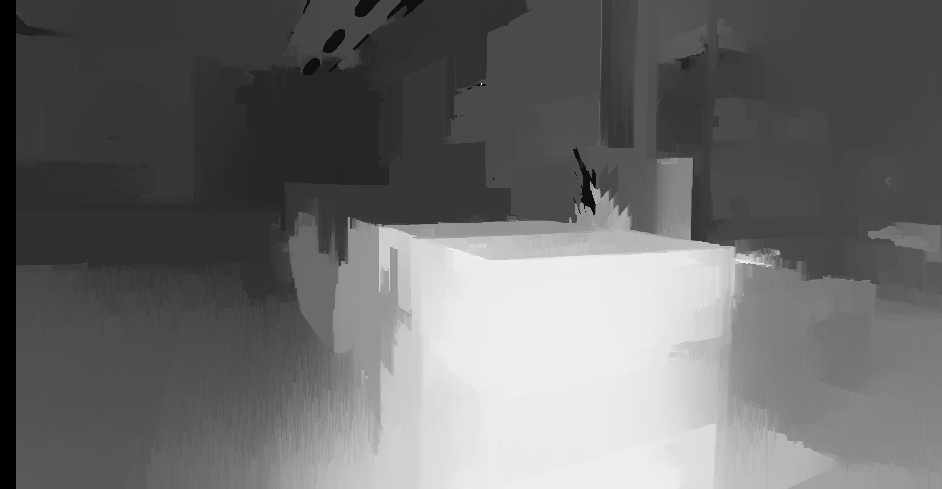

In [0]:
cv2_imshow(d_map_sgbm) # block_size = 11